In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
credit = pd.read_csv('Datasets/Credit.csv', index_col=0)
credit.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


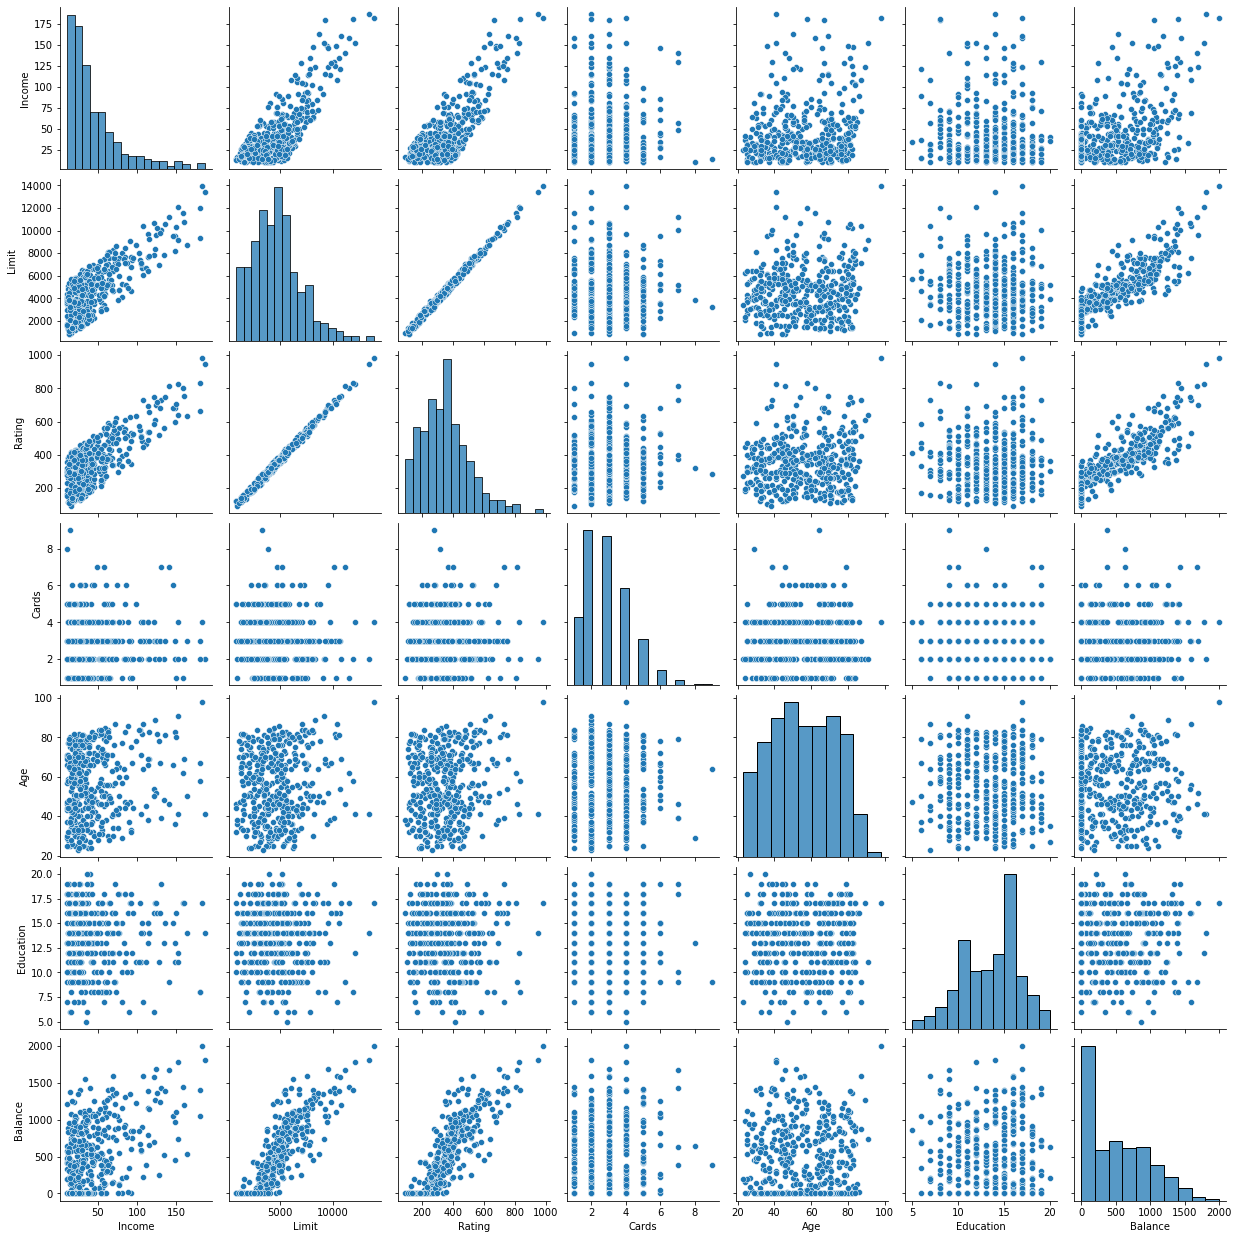

In [3]:
sns.pairplot(credit)
plt.show()

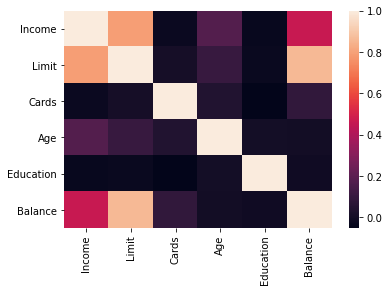

In [31]:
credit = credit.drop('Rating', axis=1)

sns.heatmap(credit.corr())
plt.show()

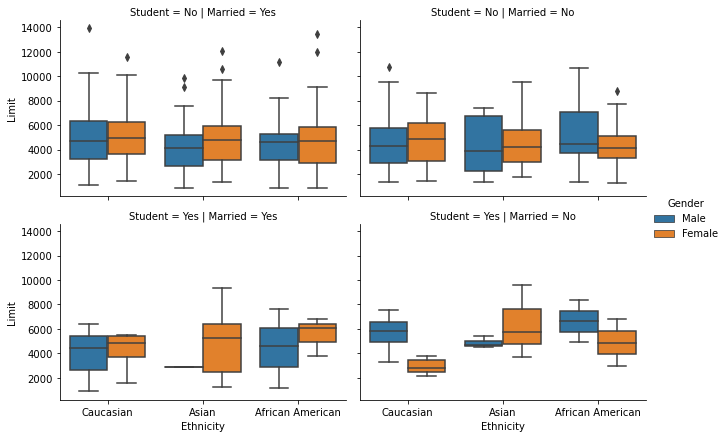

In [4]:
sns.catplot(x='Ethnicity', y='Limit',
                hue='Gender', col='Married', row='Student',
                data=credit, kind='box',
                height=3, aspect=1.5)
plt.show()

In [6]:
cat_feat = ['Gender', 'Student', 'Married', 'Ethnicity']
for feat in cat_feat:
    print(feat, '=', credit[feat].value_counts().values)

Gender = [207 193]
Student = [360  40]
Married = [245 155]
Ethnicity = [199 102  99]


In [7]:
credit.isna().any()

Income       False
Limit        False
Rating       False
Cards        False
Age          False
Education    False
Gender       False
Student      False
Married      False
Ethnicity    False
Balance      False
dtype: bool

In [8]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor

from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import train_test_split, GridSearchCV

In [25]:
X = credit.drop('Limit', axis=1)
y = credit['Limit']

X_train, X_test, y_train, y_test = train_test_split(X, y)

cat_feat = ['Gender', 'Student', 'Married', 'Ethnicity']
num_feat = ['Income', 'Cards', 'Age', 'Education', 'Balance']

In [26]:
num_process = make_pipeline(SimpleImputer(strategy='median'), 
                            StandardScaler())

cat_process = make_pipeline(SimpleImputer(strategy='most_frequent'), 
                            OneHotEncoder()) 

preprocess = ColumnTransformer(transformers=
                                   [('num', num_process, num_feat), 
                                    ('cat', cat_process, cat_feat)])


model_lr = make_pipeline(preprocess, Ridge())
param_grid_lr = {'ridge__alpha': [0.1, 1, 10]}
grid_lr = GridSearchCV(model_lr, param_grid=param_grid_lr, cv=5)

In [27]:
grid_lr.fit(X_train, y_train)
grid_lr.score(X_train, y_train)

0.976557904024018

In [28]:
model_rf = make_pipeline(preprocess, RandomForestRegressor())
param_grid_rf = {'randomforestregressor__max_depth': [2, 10, 50]}
grid_rf = GridSearchCV(model_rf, param_grid=param_grid_rf, cv=5)

grid_rf.fit(X_train, y_train)
grid_rf.score(X_test, y_test)

0.9670200253689916

In [14]:
grid_rf.get_params().keys()

dict_keys(['cv', 'error_score', 'estimator__memory', 'estimator__steps', 'estimator__verbose', 'estimator__columntransformer', 'estimator__randomforestregressor', 'estimator__columntransformer__n_jobs', 'estimator__columntransformer__remainder', 'estimator__columntransformer__sparse_threshold', 'estimator__columntransformer__transformer_weights', 'estimator__columntransformer__transformers', 'estimator__columntransformer__verbose', 'estimator__columntransformer__num', 'estimator__columntransformer__cat', 'estimator__columntransformer__num__memory', 'estimator__columntransformer__num__steps', 'estimator__columntransformer__num__verbose', 'estimator__columntransformer__num__simpleimputer', 'estimator__columntransformer__num__standardscaler', 'estimator__columntransformer__num__simpleimputer__add_indicator', 'estimator__columntransformer__num__simpleimputer__copy', 'estimator__columntransformer__num__simpleimputer__fill_value', 'estimator__columntransformer__num__simpleimputer__missing_va